In [2]:
import numpy as np
from matplotlib import pyplot as plt
from overlapped_classes import overlapped_classes

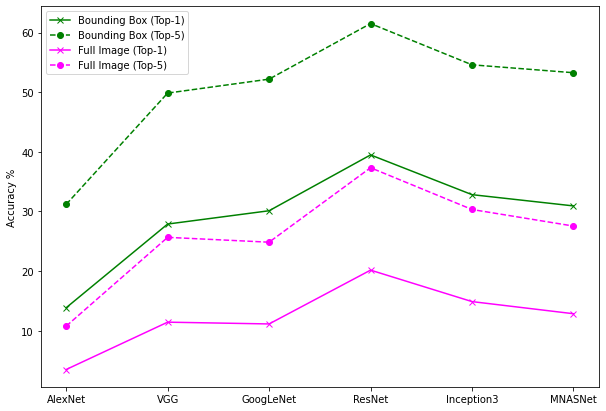

In [22]:
model_names = ['AlexNet', 'VGG', 'GoogLeNet', 'ResNet', 'Inception3', 'MNASNet']
txtfiles = ['./SummaryBox.txt', './SummaryFull.txt'] #, './SummaryCrop.txt']
colors = ['green', 'magenta', 'black']

fig = plt.figure(figsize=[10, 7])

for ti, tf in enumerate(txtfiles):
    res = {}
    with open(tf) as f:
        data = f.readlines()
        
    for m in model_names:
        idx = data.index(m + '\n')
        res[m] = [float(data[idx + 115].strip()), float(data[idx + 116].strip())]
        
    scores = np.array(list(res.values()))
    plt.plot(scores[:,0], '-', marker='x', color=colors[ti])
    plt.plot(scores[:,1], '--', marker='o', color=colors[ti])
    
plt.xticks([0, 1, 2, 3, 4, 5], model_names)    
plt.legend(['Bounding Box (Top-1)', 'Bounding Box (Top-5)', 'Full Image (Top-1)', 'Full Image (Top-5)', 'Center Crop (Top-1)' , 'Center Crop (Top-5)'])
plt.ylabel('Accuracy %')
# plt.grid(True)
plt.show()
fig.savefig('./figs/ourRes.png')        

In [253]:
del mpl

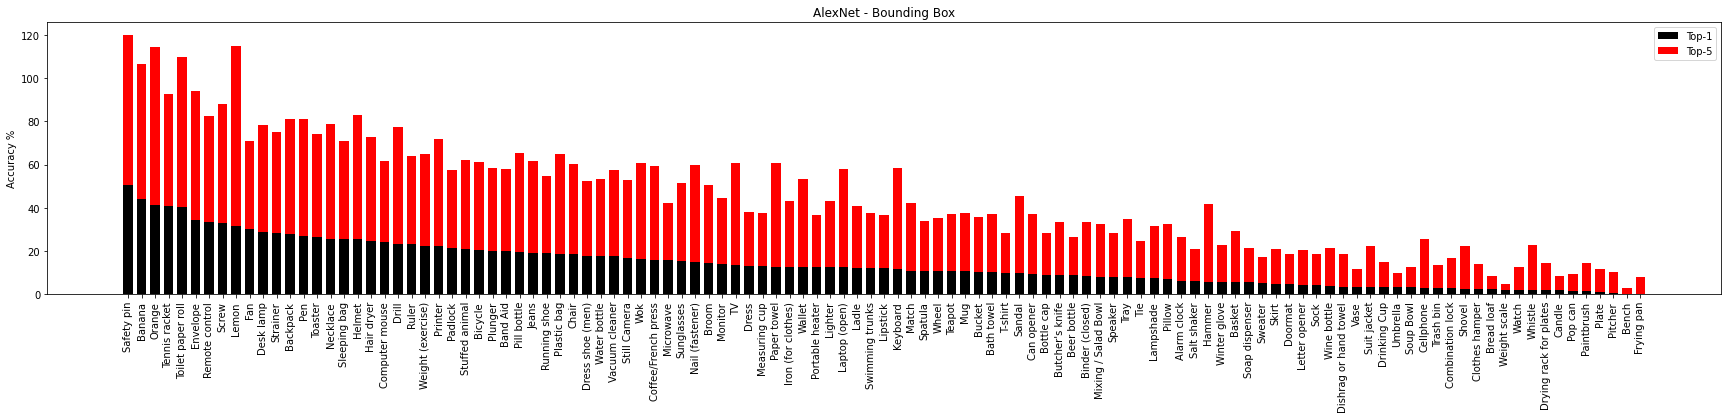

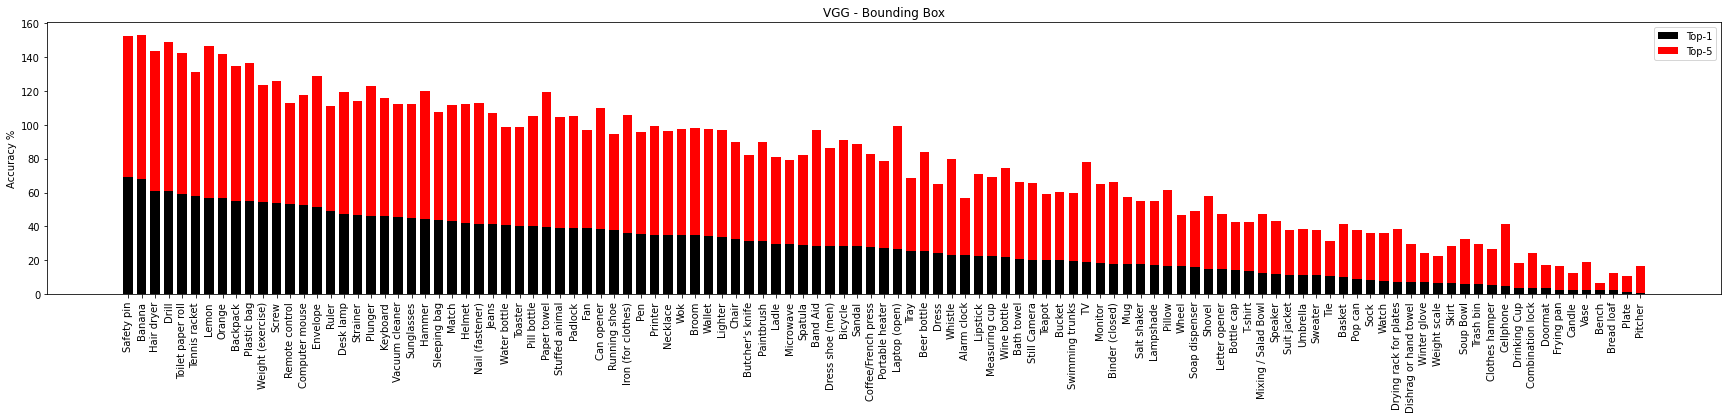

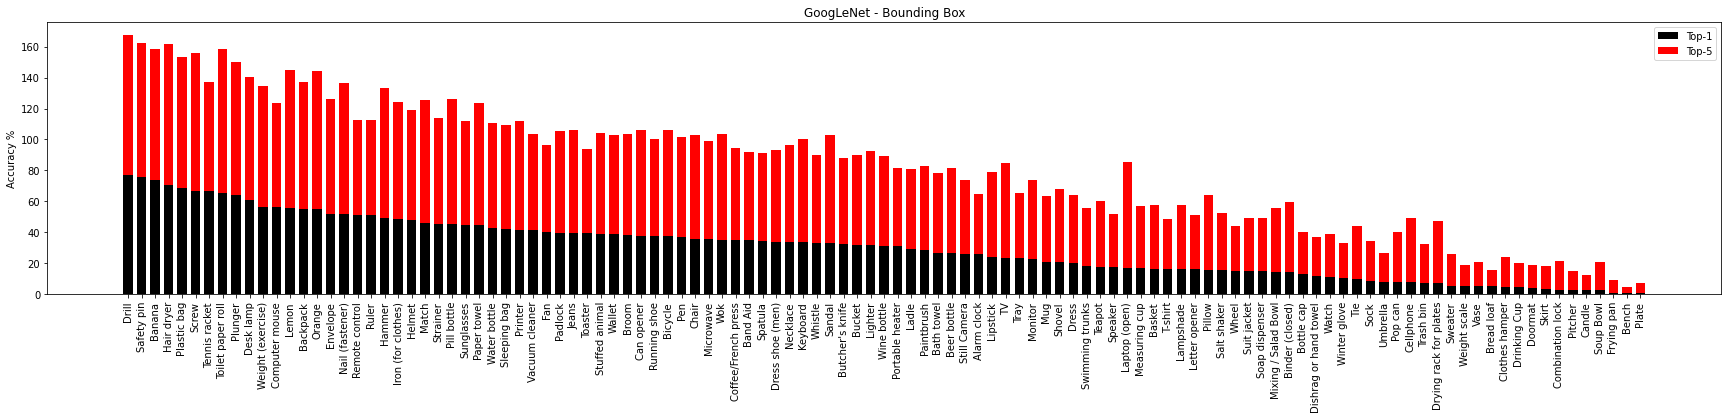

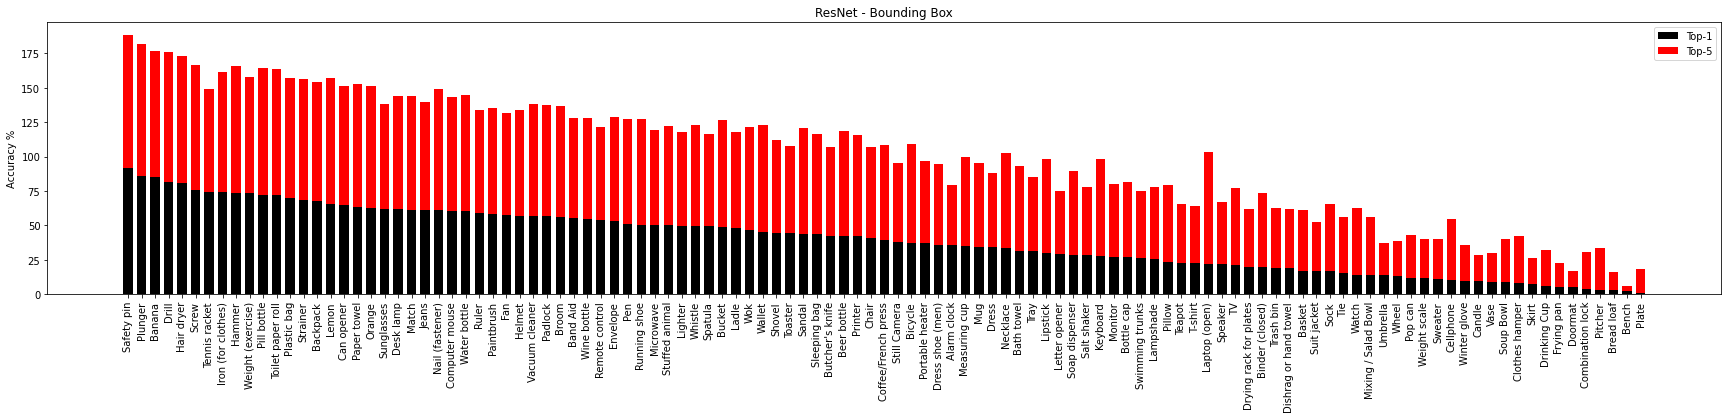

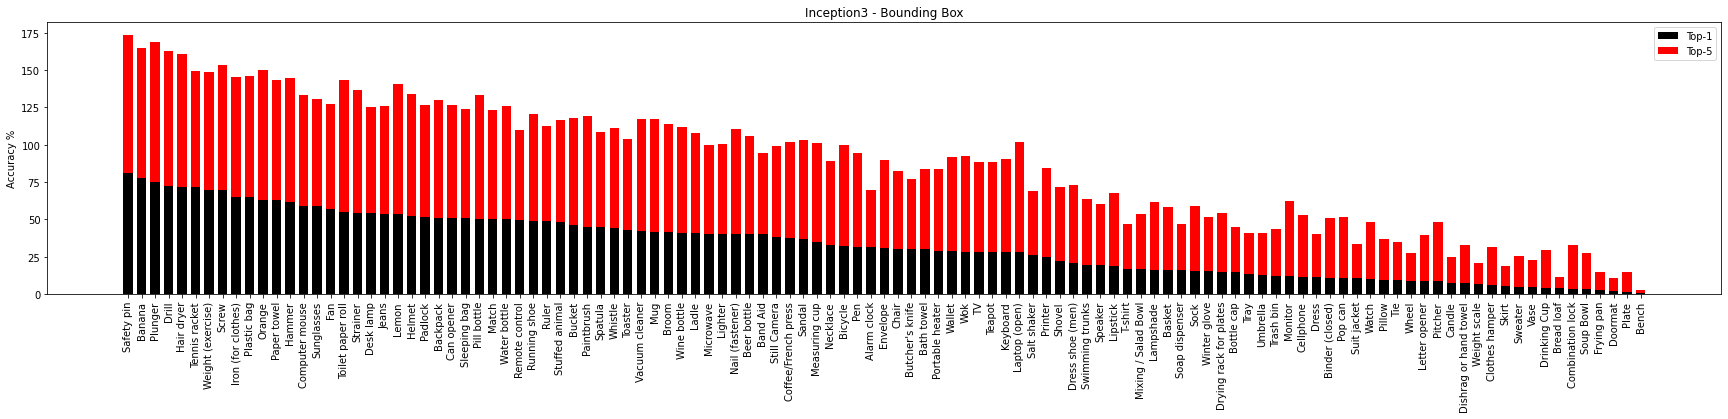

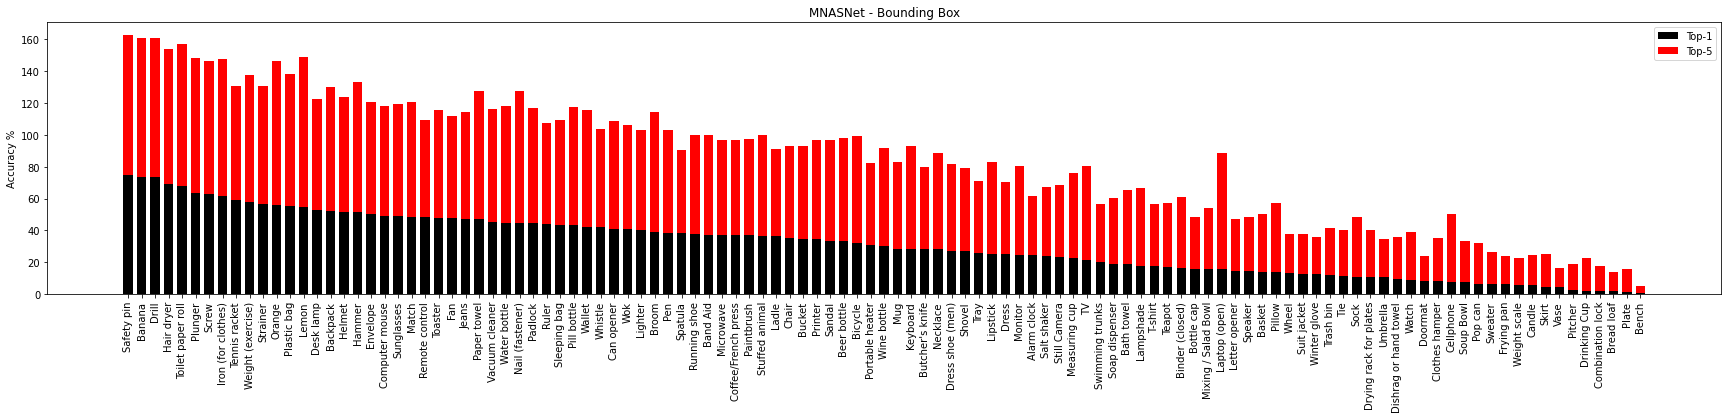

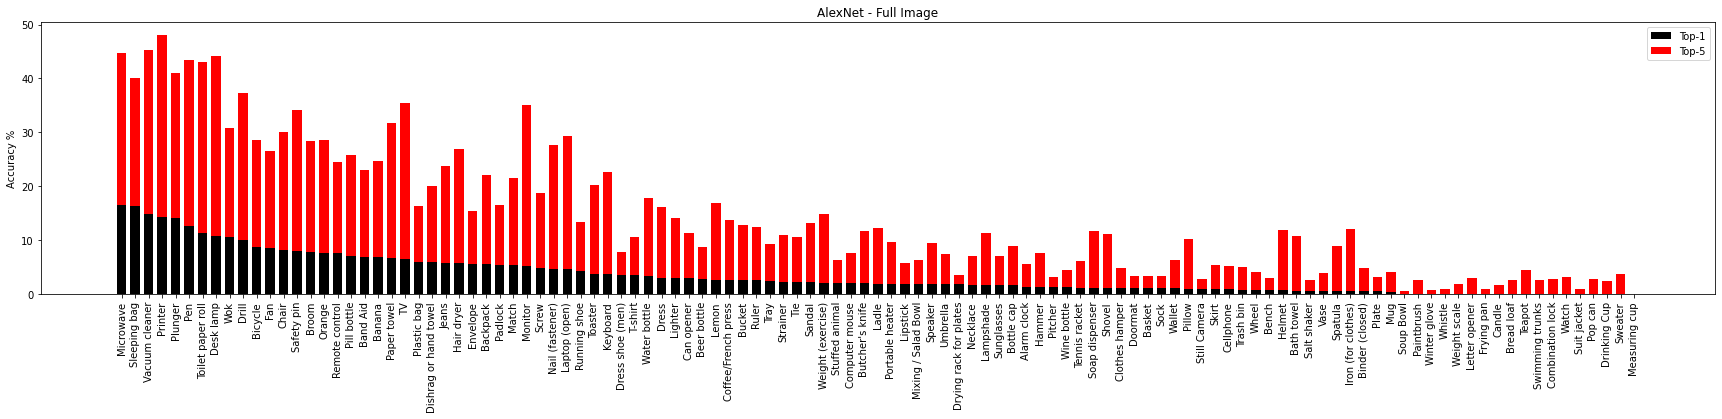

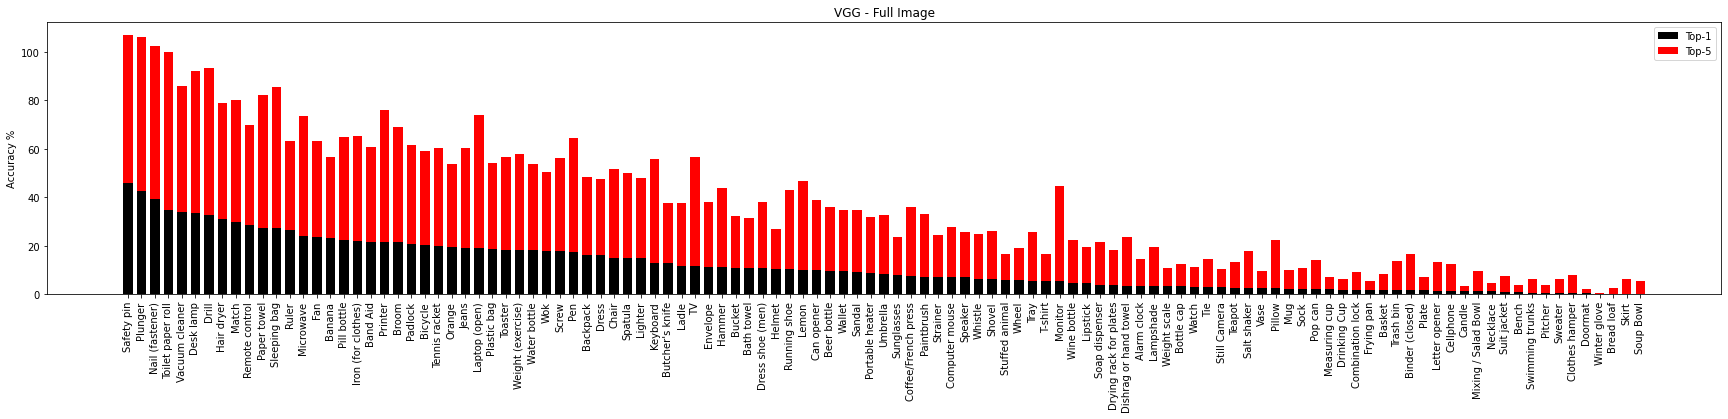

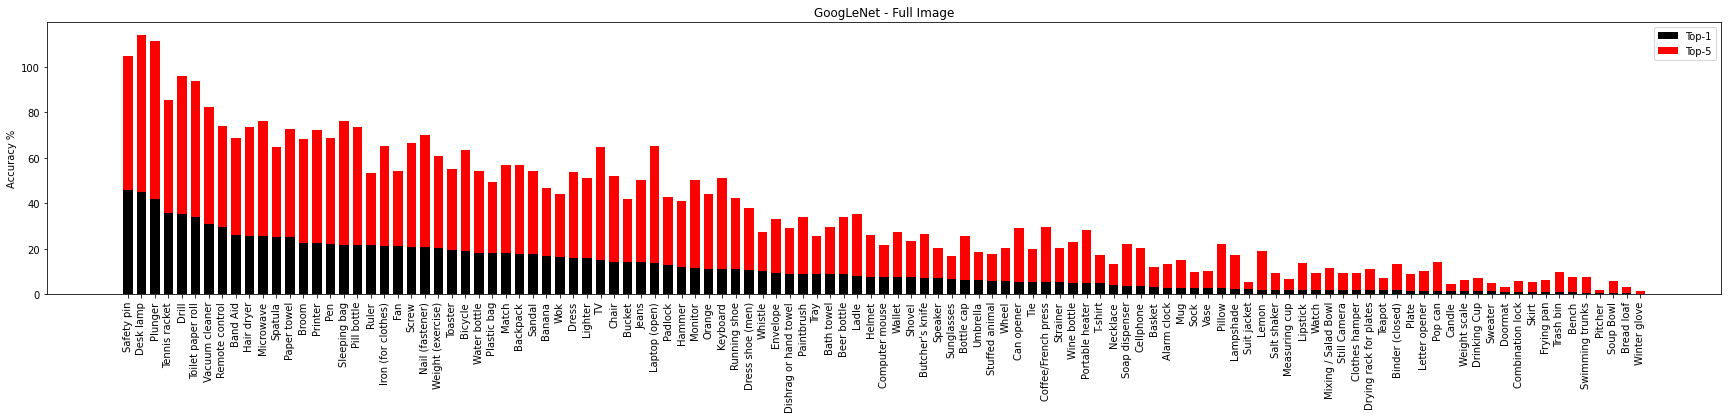

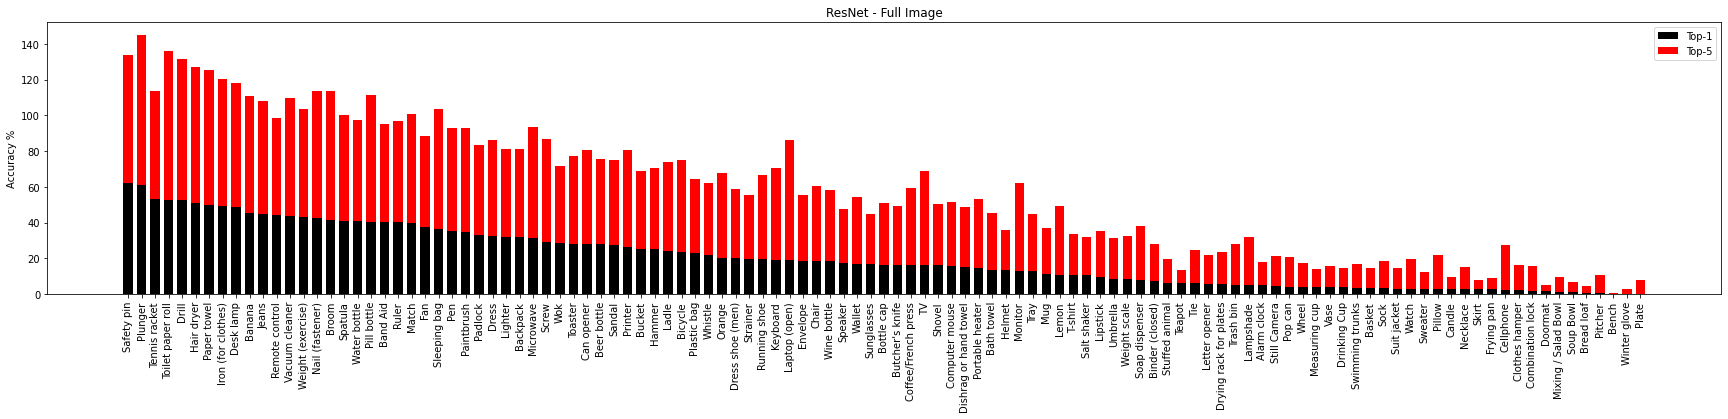

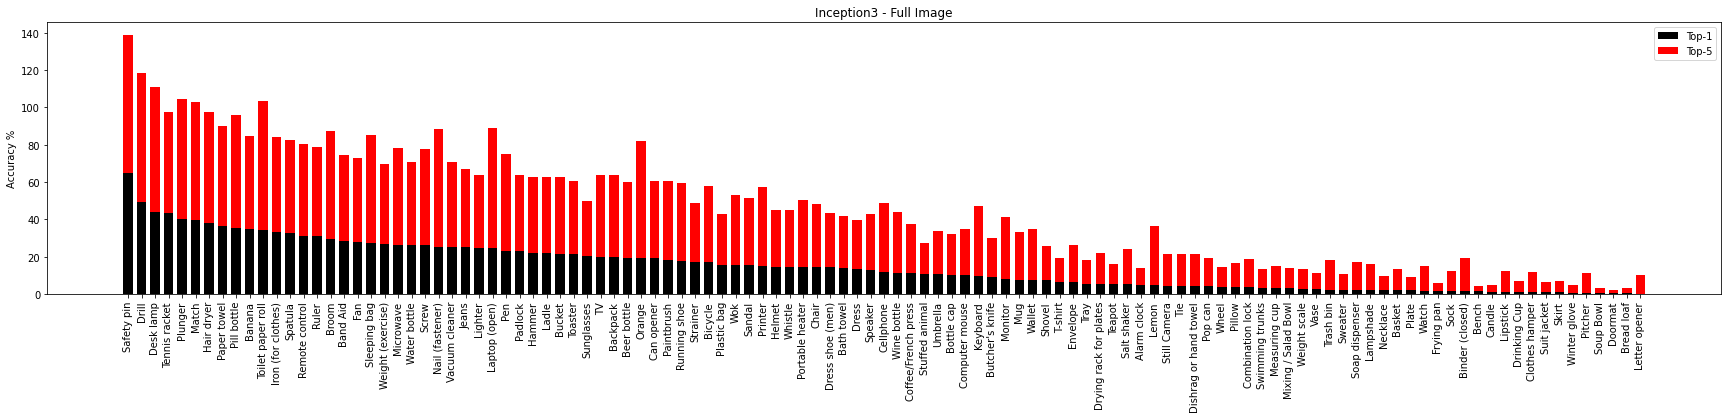

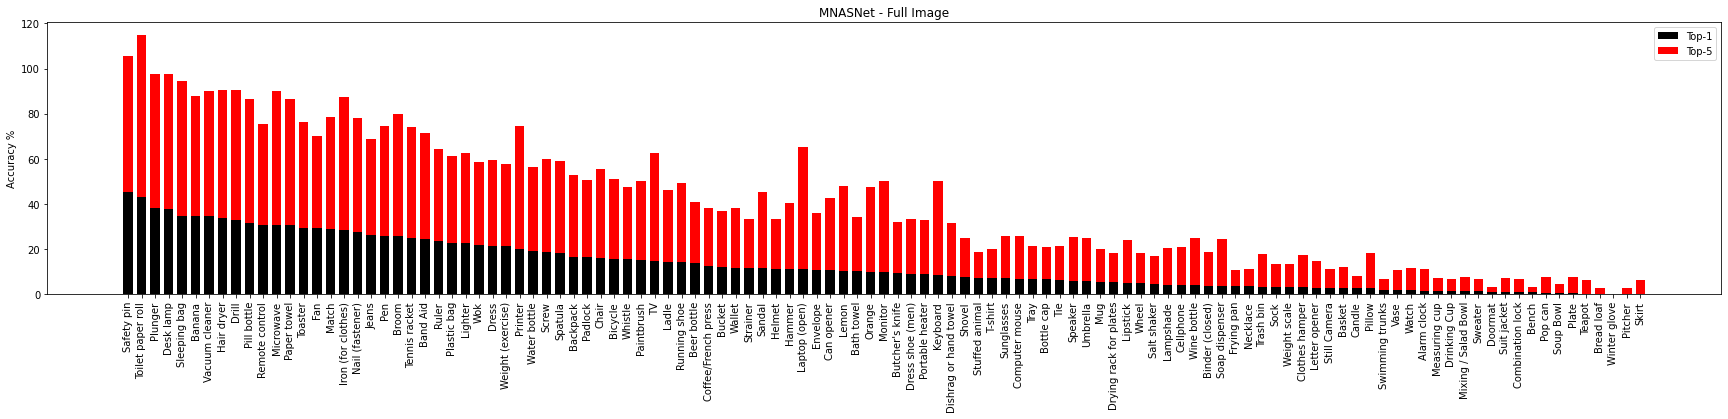

In [17]:
# plot per category
# import matplotlib as mpl
# mpl.use("pgf")

# import matplotlib.pyplot as plt


model_names = ['AlexNet', 'VGG', 'GoogLeNet', 'ResNet', 'Inception3', 'MNASNet']
txtfiles = ['./SummaryBox.txt', './SummaryFull.txt']
txts = [' - Bounding Box', ' - Full Image']
colors = ['green', 'magenta', 'red']



for ti, tf in enumerate(txtfiles):
    with open(tf) as f:
        data = f.readlines()

    for m in model_names:
        idx = data.index(m + '\n') # only for resNet
        top_1, top_5 = [], []
        for j in range(113):
            ss = data[idx+j+2].split('top 1: ')[1].split('  -')
            top_1.append(float(ss[0]))
            ss = data[idx+j+2].split('top 5: ')[1].split('  ')        
            top_5.append(float(ss[0]))        

        fig, ax = plt.subplots(figsize=[30, 5])                
        
        top_1, top_5 = np.array(top_1), np.array(top_5)
        sort_indices = np.argsort(top_1)[::-1]
        
        ax.bar(np.arange(len(top_1)), top_1[sort_indices], .7, color = 'black')    
        ax.bar(np.arange(len(top_5)), top_5[sort_indices], .7, color = 'red', bottom=top_1[sort_indices])        
    
        plt.xticks(np.arange(len(top_1)), np.array(overlapped_classes)[sort_indices], rotation = 90)    
        # plt.legend(['Bounding Box (Top-1)', 'Bounding Box (Top-5)', 'Full Image (Top-1)', 'Full Image (Top-5)', 'Center Crop (Top-1)' , 'Center Crop (Top-5)'])
        plt.ylabel('Accuracy %')
        plt.title(m + txts[ti])
        plt.legend(['Top-1', 'Top-5'])
        
        plt.show()
        fig.tight_layout()
        fig.savefig('./figs/' + m + txts[ti] + '.png')        


In [180]:
'0 -> Alarm clock: top 1: 35.42  -  top 5: 43.75'.split('top 1: ')[1].split('  -')
# ss

['35.42', '  top 5: 43.75']

In [229]:
top_1

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.53,  0.62,  0.71,  0.76,
        0.93,  1.05,  1.12,  1.24,  1.26,  1.26,  1.29,  1.39,  1.9 ,
        1.92,  2.04,  2.55,  2.58,  2.76,  2.78,  2.94,  3.07,  3.23,
        3.3 ,  3.31,  3.51,  3.54,  3.68,  3.83,  3.85,  3.9 ,  4.07,
        4.58,  4.92,  5.06,  5.45,  5.5 ,  5.62,  5.66,  6.11,  6.85,
        6.88,  6.94,  7.03,  7.06,  7.33,  7.41,  8.  ,  8.59,  8.74,
        8.93,  9.23,  9.65,  9.79, 10.07, 10.14, 10.78, 10.92, 11.11,
       11.11, 11.27, 11.61, 11.63, 11.64, 12.08, 12.7 , 13.7 , 14.29,
       14.29, 14.84, 15.29, 15.6 , 15.65, 15.91, 16.46, 16.6 , 18.45,
       18.72, 19.07, 20.  , 21.13, 21.43, 21.95, 22.49, 22.89, 23.68,
       24.59, 24.69, 25.86, 25.93, 26.16, 27.59, 28.32, 28.83, 29.19,
       29.45, 30.49, 30.58, 30.6 , 31.76, 32.67, 33.71, 34.46, 34.47,
       34.55, 37.95, 38.06, 43.14, 45.45])

In [221]:
top_1 = np.array(top_1)

In [228]:
a, b = np.argsort(top_1)

ValueError: too many values to unpack (expected 2)

In [225]:
top_1

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.53,  0.62,  0.71,  0.76,
        0.93,  1.05,  1.12,  1.24,  1.26,  1.26,  1.29,  1.39,  1.9 ,
        1.92,  2.04,  2.55,  2.58,  2.76,  2.78,  2.94,  3.07,  3.23,
        3.3 ,  3.31,  3.51,  3.54,  3.68,  3.83,  3.85,  3.9 ,  4.07,
        4.58,  4.92,  5.06,  5.45,  5.5 ,  5.62,  5.66,  6.11,  6.85,
        6.88,  6.94,  7.03,  7.06,  7.33,  7.41,  8.  ,  8.59,  8.74,
        8.93,  9.23,  9.65,  9.79, 10.07, 10.14, 10.78, 10.92, 11.11,
       11.11, 11.27, 11.61, 11.63, 11.64, 12.08, 12.7 , 13.7 , 14.29,
       14.29, 14.84, 15.29, 15.6 , 15.65, 15.91, 16.46, 16.6 , 18.45,
       18.72, 19.07, 20.  , 21.13, 21.43, 21.95, 22.49, 22.89, 23.68,
       24.59, 24.69, 25.86, 25.93, 26.16, 27.59, 28.32, 28.83, 29.19,
       29.45, 30.49, 30.58, 30.6 , 31.76, 32.67, 33.71, 34.46, 34.47,
       34.55, 37.95, 38.06, 43.14, 45.45])

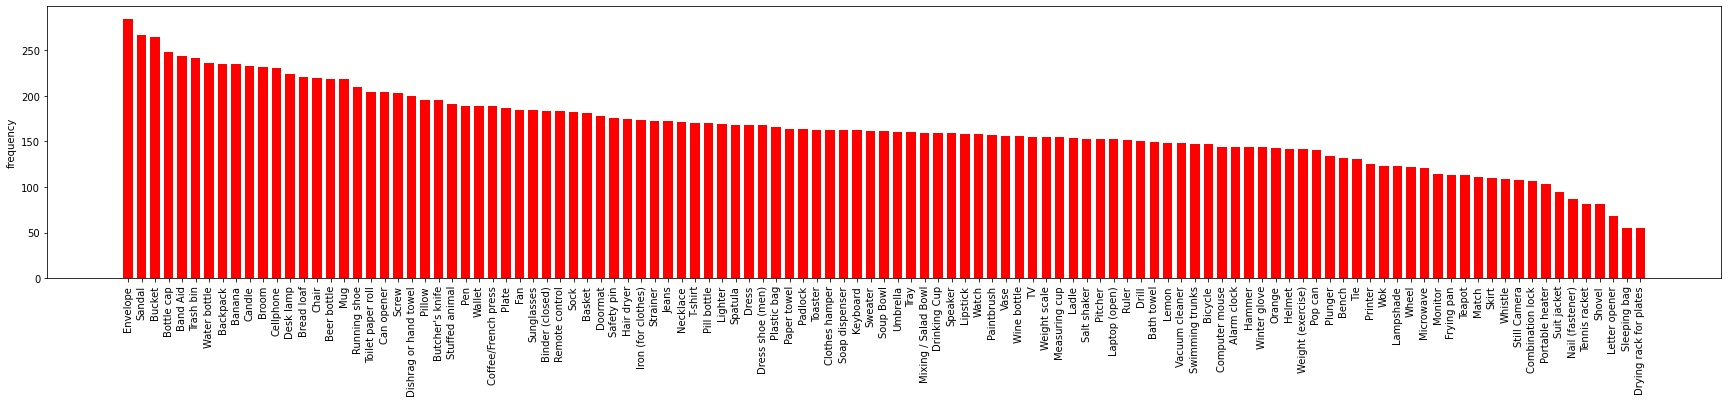

In [27]:


model_name = 'AlexNet'
txtfiles = './SummaryBox.txt'

with open(txtfiles) as f:
    data = f.readlines()

freq = []        
idx = data.index(model_name + '\n') # only for resNet
for j in range(113):
    ss = data[idx+j+2].split('num imgs: ')[1]
    freq.append(int(ss[:-2]))

fig, ax = plt.subplots(figsize=[30, 5])                

freq = np.array(freq)
sort_indices = np.argsort(freq)[::-1]

ax.bar(np.arange(len(freq)), freq[sort_indices], .7, color = 'red')    

plt.xticks(np.arange(len(freq)), np.array(overlapped_classes)[sort_indices], rotation = 90)    
# plt.legend(['Bounding Box (Top-1)', 'Bounding Box (Top-5)', 'Full Image (Top-1)', 'Full Image (Top-5)', 'Center Crop (Top-1)' , 'Center Crop (Top-5)'])
plt.ylabel('frequency')
# plt.title(m + txts[ti])
# plt.legend(['Top-1', 'Top-5'])

plt.show()
fig.tight_layout()
fig.savefig('./figs/freq.png')        


In [25]:
ss

'144]\n'